Tabel statitici descriptive

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("../data/processed/date_standardizate.csv")

stats=df[['governanceScore', 'Stock_return', 'marketCap', 'environmentScore']].describe()
print("Tabel statistici descriptive: ")
print(stats)

Tabel statistici descriptive: 
       governanceScore  Stock_return     marketCap  environmentScore
count     4.260000e+02  4.260000e+02  4.260000e+02      4.260000e+02
mean     -1.605393e-16  7.505733e-17  1.876433e-17     -1.667941e-17
std       1.000000e+00  1.000000e+00  1.000000e+00      1.000000e+00
min      -1.727616e+00 -1.881944e+00 -3.309648e-01     -1.136020e+00
25%      -6.689285e-01 -5.051794e-01 -2.854910e-01     -7.864353e-01
50%      -2.844761e-01 -1.786133e-01 -2.220466e-01     -3.337435e-01
75%       4.324758e-01  2.954625e-01 -7.468444e-02      6.300680e-01
max       5.878308e+00  1.249209e+01  1.023799e+01      3.769943e+00


Distributia variabilelor

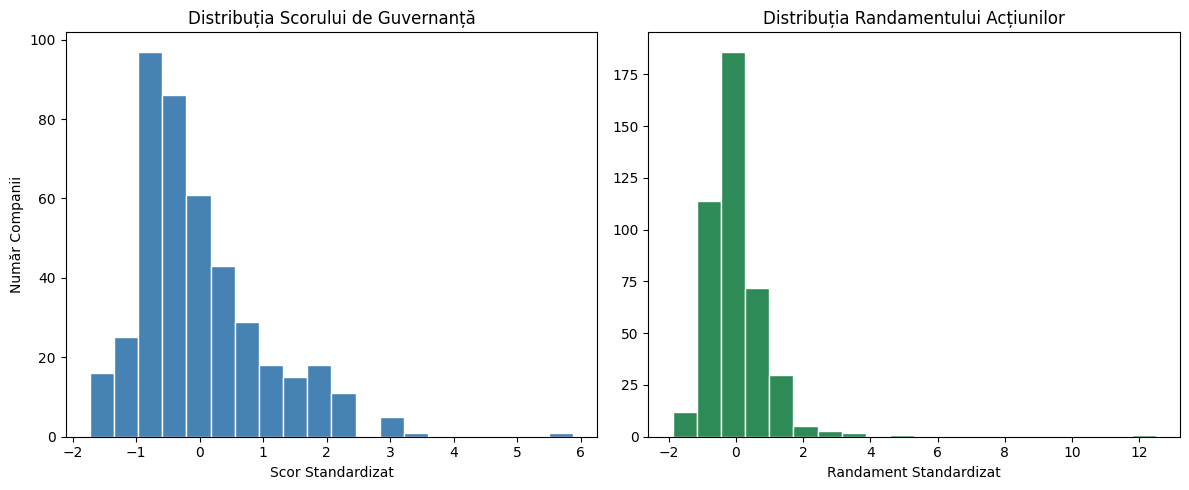

In [7]:
# Creăm o figură cu 2 histograme (Guvernanță și Profit)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogramă Guvernanță
ax1.hist(df['governanceScore'], bins=20, color='steelblue', edgecolor='white')
ax1.set_title('Distribuția Scorului de Guvernanță')
ax1.set_xlabel('Scor Standardizat')
ax1.set_ylabel('Număr Companii')

# Histogramă Randament
ax2.hist(df['Stock_return'], bins=20, color='seagreen', edgecolor='white')
ax2.set_title('Distribuția Randamentului Acțiunilor')
ax2.set_xlabel('Randament Standardizat')

plt.tight_layout()
plt.show()

Matricea de corelatie

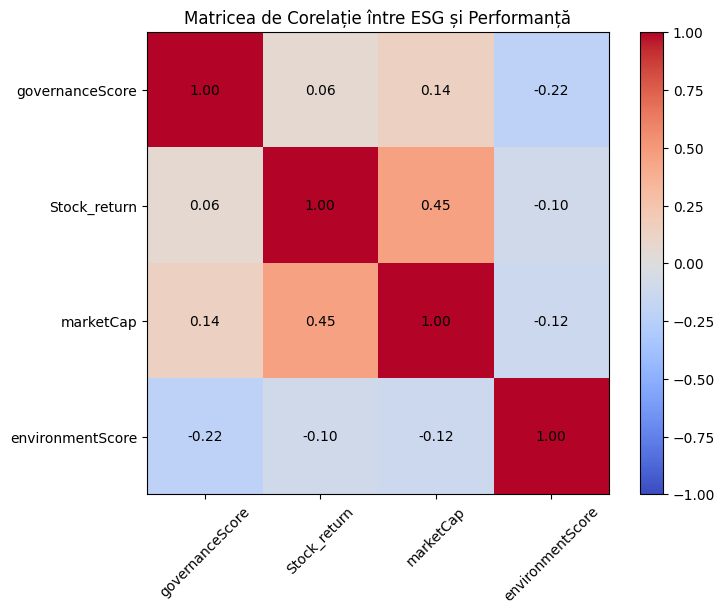

In [ ]:
cols = ['governanceScore', 'Stock_return', 'marketCap', 'environmentScore']
corr_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

# Adăugăm etichetele
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)

# Adăugăm valorile numerice peste culori pentru claritate
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Matricea de Corelație între ESG și Performanță")
plt.show()

Indicii de diversitate (Shannon si Simpson)

In [ ]:
import numpy as np

def diversitate(tabel,denumire_coloana=None):
    if denumire_coloana is not None:
        date=np.array(tabel.iloc[1:],dtype=float)
    else:
        date=np.array(tabel.values,dtype=float)

    suma=np.sum(date)
    proportii=date/suma

    #definire indice Shannon
    shannon=-np.sum(proportii*np.log(proportii))
    #definire indice Simpson
    simpson=1-np.sum(date/suma*date/suma)

    if denumire_coloana is not None:
        result=pd.Series([tabel.iloc[0],shannon,simpson],index=['denumire_coloana','Shannon','Simpson'])
    else:
        results = pd.Series(data=[shannon, simpson], index=['Shannon', 'Simpson'])

    return results

frecventa_sectoare = df['GICS Sector'].value_counts()
rezultate_totale=diversitate(frecventa_sectoare)

print("Indicii de diversitate pentru sectoare: ")
print(rezultate_totale)

Indicii de diversitate pentru tot indicele S&P 500:
Shannon    2.299556
Simpson    0.891754
dtype: float64


Vizualizare structura

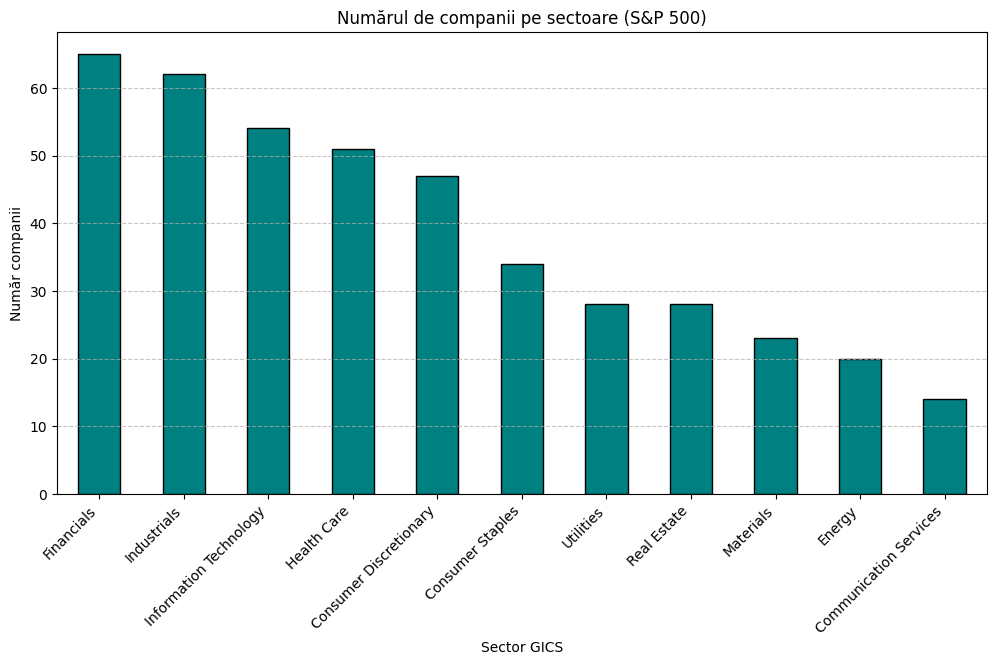

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
frecventa_sectoare.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Numărul de companii pe sectoare (S&P 500)')
plt.ylabel('Număr companii')
plt.xlabel('Sector GICS')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()